In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/organizations/mlg-ulb/creditcardfraud/creditcard.csv


In [29]:

file_path = '/kaggle/input/datasets/organizations/mlg-ulb/creditcardfraud/creditcard.csv'
df = pd.read_csv(file_path)

# make sure reading the dataset successfully
# print(f"dataset size: {df.shape}")
# df.head()

In [30]:

# corelation matrix
corr_matrix = df.corr()

# corelation with class
corr_with_class = corr_matrix["Class"].sort_values(ascending=False)

print(corr_with_class)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [31]:
# to get absolute value
corr_with_class = corr_matrix["Class"].drop("Class")

corr_with_class_abs = corr_with_class.abs().sort_values(ascending=False)

print(corr_with_class_abs)


V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


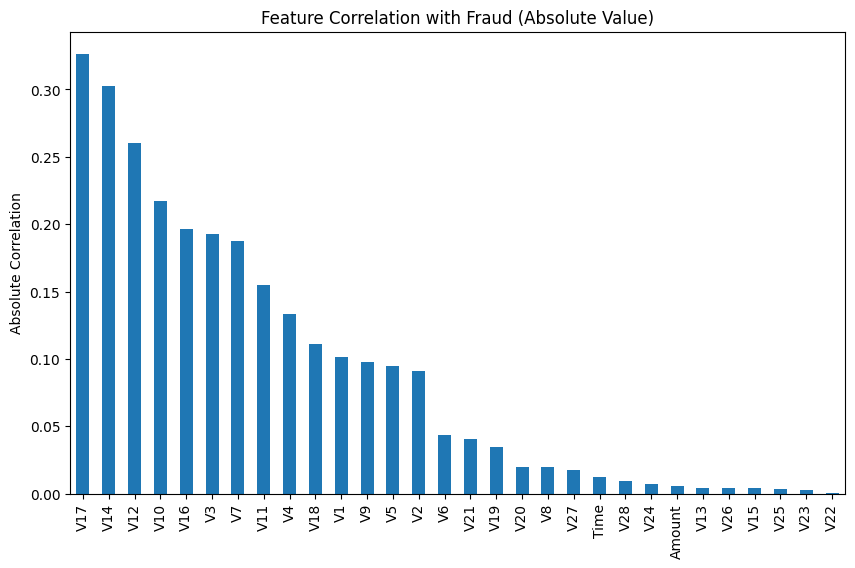

In [32]:
# graph 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
corr_with_class_abs.plot(kind='bar')
plt.title("Feature Correlation with Fraud (Absolute Value)")
plt.ylabel("Absolute Correlation")
plt.show()


In [33]:
# Mutual Information -- explore non-linear relationship
from sklearn.feature_selection import mutual_info_classif

X = df.drop("Class", axis=1)
y = df["Class"]

mi = mutual_info_classif(X, y)

mi_series = pd.Series(mi, index=X.columns)
mi_sorted = mi_series.sort_values(ascending=False)

print(mi_sorted)


V17       0.008258
V14       0.008136
V12       0.007601
V10       0.007530
V11       0.006831
V16       0.006144
V4        0.004978
V3        0.004952
V18       0.004317
V9        0.004277
V7        0.003952
V2        0.003228
V21       0.002452
V27       0.002444
V5        0.002389
V6        0.002388
V1        0.002127
Time      0.001908
V8        0.001898
V28       0.001871
Amount    0.001492
V19       0.001470
V20       0.001207
V23       0.000762
V24       0.000642
V26       0.000500
V25       0.000500
V13       0.000408
V22       0.000353
V15       0.000315
dtype: float64


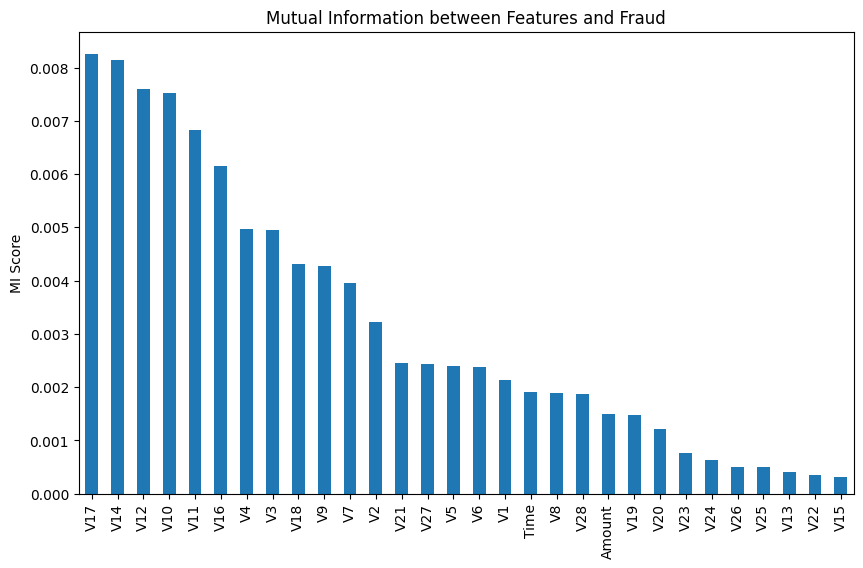

In [34]:
# draw the graph
plt.figure(figsize=(10,6))
mi_sorted.plot(kind='bar')
plt.title("Mutual Information between Features and Fraud")
plt.ylabel("MI Score")
plt.show()


In [35]:
top_10_features = corr_with_class_abs.head(10).index.tolist()
print(top_10_features)


['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']


In [36]:
 # Random Forest feature importance
from sklearn.ensemble import RandomForestClassifier

X = df.drop("Class", axis=1)
y = df["Class"]

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

importances = rf.feature_importances_
importance_series = pd.Series(importances, index=X.columns)
importance_sorted = importance_series.sort_values(ascending=False)

print(importance_sorted)


V17       0.164215
V12       0.132634
V14       0.129423
V16       0.077583
V10       0.073544
V11       0.051311
V18       0.032571
V9        0.029370
V7        0.026974
V4        0.026591
V26       0.020565
V3        0.020433
V21       0.018258
V2        0.013850
V8        0.013461
V27       0.013406
V1        0.013176
V20       0.012940
V6        0.012899
V19       0.012791
Time      0.012395
Amount    0.012019
V13       0.011705
V15       0.011124
V5        0.011054
V22       0.010345
V24       0.009754
V28       0.009214
V25       0.008224
V23       0.008172
dtype: float64


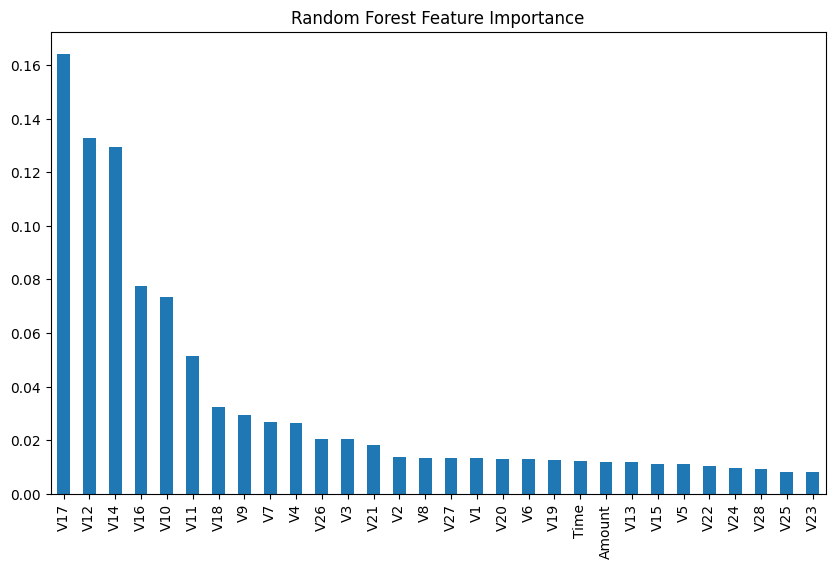

In [37]:
# graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
importance_sorted.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.show()
